In [ ]:
!pip install neuralprophet

In [ ]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle

Read in data and process dates


In [4]:
df = pd.read_csv('/content/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.Location.unique()

In [ ]:
df.isnull().sum()

In [ ]:
df.dtypes

In [ ]:
melb = df[df['Location']=='Melbourne']
melb['Date']= pd.to_datetime(melb['Date'])
melb.head()

In [ ]:
melb.dtypes

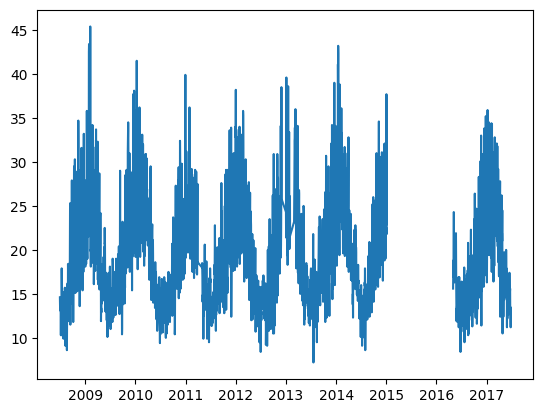

In [10]:
plt.plot(melb['Date'], melb['Temp3pm'])
plt.show()

In [ ]:
melb['Year'] = melb['Date'].apply(lambda x: x.year)
melb = melb[melb['Year']<=2015]
plt.plot(melb['Date'], melb['Temp3pm'])
plt.show()

In [ ]:
data = melb[['Date', 'Temp3pm']]
data.dropna(inplace=True)
data.columns = ['ds', 'y']
data.head()

Train model

In [ ]:
m = NeuralProphet()
m.fit(data, freq='D', epochs=10)

forecast

In [ ]:
future = m.make_future_dataframe(data, periods=900)
forecast = m.predict(future)
forecast.head()

In [ ]:
plot1 = m.plot(forecast)

In [ ]:
plt2 = m.plot_components(forecast)